<a href="https://colab.research.google.com/github/ashley-ha/local-ocr/blob/main/ocr_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import Libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!pip install git+https://github.com/JaidedAI/EasyOCR.git

  Cloning https://github.com/JaidedAI/EasyOCR.git to /tmp/pip-req-build-a5e_8wzu
  Running command git clone --filter=blob:none --quiet https://github.com/JaidedAI/EasyOCR.git /tmp/pip-req-build-a5e_8wzu
  Resolved https://github.com/JaidedAI/EasyOCR.git to commit c4f3cd7225efd4f85451bd8b4a7646ae9a092420
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 912.2/912.2 kB 27.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.8/286.8 kB 19.0 MB/s eta 0:00:00
  Created wheel for easyocr: filename=easyocr-1.7.2-py3-none-any.whl size=77013350 sha256=c77840c374561ab8e80000b2ccd9bf674d58cab7a32875e17f01db2459d50bd3
  Stored in directory: /tmp/pip-ephem-wheel-cache-aehqdpvb/wheels/32/ab/5e/8523f0a0cb58d1e8c057334ca97927f43efae639acf99cb396
Successfully built easyocr


In [3]:
# More Libraries
import easyocr
import transformers

In [8]:
# Source of truth for time and miles example
# [3.75, 7.5, 11.25, 15.0],
# [30.0, 33.75, 37.5, 41.25],
# [38, 117, 159, 240],
# [38, 127, 215, 318],
# [38, 120, 209, 300],
# ["7:19:27", "8:34:52", "9:49:52", "10:59:00"],
# ["8:12", "9:01", "11:20:04", "12:42"],
# ["58:08", "9:18", "10:11", "11:04:3"],
# ["206.85", "244.48", "324.11", "402"],
# ["49 41", "51 56", "57 31", "101 49"],
# ["8:12", "8:58", "9:52", "11:01"],
# ["38", "8:47", "", ""],
# ["38", "8:47", "", ""],
# ["8:09:08", "8:47:08", "9:22:51", "10:04:18"],
# ["8:07:30", "8:35:00", "9:10:00", "9:41:30"],
# ["8:09:40", "8:40:50", "9:21:48", "10:06:11"],
# ["7:11", "9:44", "11:11", "12:47"],
# ["34°C", "", "9:21:48", "10:3"],
# ["7:09", "", "", ""],
# ["34°C", "", "", ""],
# ["7:09", "", "", ""],
# ["8:09:54", "8:39:54", "9:18", "10:00"],
# ["1:08", "1:52", "2:49", "3:41"],
# ["8:10", "8:51", "9:35", "10:19"],
# ["1:42", "2:44", "3:44", "4:48"]

In [5]:
# Easy screenshot example
reader = easyocr.Reader(['en'])
result = reader.readtext(r'/content/example.png')
print(result)

[([[106, 8], [196, 8], [196, 38], [106, 38]], 'Finder', 0.9999983939890842), ([[230, 8], [278, 8], [278, 38], [230, 38]], 'File', 0.9999996423721313), ([[314, 8], [368, 8], [368, 38], [314, 38]], 'Edit', 0.7983247987206226), ([[402, 8], [466, 8], [466, 38], [402, 38]], 'View', 0.995967477972857), ([[502, 10], [542, 10], [542, 38], [502, 38]], 'Go', 0.5165257615427742), ([[580, 8], [680, 8], [680, 38], [580, 38]], 'Window', 0.8848516792677537), ([[716, 10], [778, 10], [778, 40], [716, 40]], 'Help', 0.9999959468841553), ([[426, 112], [517, 112], [517, 130], [426, 130]], 'neainawals', 0.11509754258671531), ([[530, 123], [966, 123], [966, 156], [530, 156]], 'Cherry Bomb, Misery Business, eda_.', 0.5789004190969347), ([[532, 166], [600, 166], [600, 192], [532, 192]], 'Radio', 0.6750453845195079), ([[589, 239], [661, 239], [661, 275], [589, 275]], 'ROSE', 0.9932753738885466), ([[596, 264], [650, 264], [650, 294], [596, 294]], 'HARrnO', 0.030544939878626012), ([[668, 346], [718, 346], [718, 3

In [11]:
# More complex example of time and miles written on paper
# Adjust parameters for better handwriting recognition
result = reader.readtext(r'/content/test-time-miles.jpg',
    paragraph=False,
    detail=1,
    contrast_ths=0.2,  # Increase contrast threshold for better text detection
    adjust_contrast=0.8,  # Adjust contrast for clearer text
    text_threshold=0.7,  # Confidence threshold for text detection
    width_ths=1.0,  # Increase width threshold for better box separation
    height_ths=0.5,  # Height threshold for merging boxes
)

# Process results
data = []
current_row = []
last_y = None
y_threshold = 10  # Adjust this value based on your image

# Sort results by y-coordinate first, then x-coordinate
sorted_results = sorted(result, key=lambda x: (x[0][0][1], x[0][0][0]))

for detection in sorted_results:
    bbox, text, conf = detection
    y_coord = bbox[0][1]

    # Clean the text
    text = text.strip().replace(' ', '')

    # If this is a new row
    if last_y is None or abs(y_coord - last_y) > y_threshold:
        if current_row:
            data.append(current_row)
        current_row = [text]
    else:
        current_row.append(text)

    last_y = y_coord

# Add the last row
if current_row:
    data.append(current_row)

# Print results in array format
for row in data:
    print(row)

['3.75miles|75', '4L25', '15.0']
['30.0', '33.75', '41.25', '37.5']
['7', '34', 'L']
['1z', '677', '459']
['33', '25', '2']
['T2O', '33', '1Q', '1ze0']
['RZT', 'LoADS', 'LiL']
['7L72+S', 'JSlesto']
['ZE24E', '%4254']
['EE0P', 'ZST', '71743', '4-1X']
['744FZZL', 'ZUH']
['ToT', '49', 'L(', '51', '5L3L', '56']
['31', '451', 'G:|']
['3X']
['347']
['58']
['3LETw', '[509,03', '&Z&']
['ZA', '31', 'pSZEZE5c', 'L56']
['KZ', '770', 'ID']
['ZHS', '40k4']
['31SS']
['[a']
['3TH', '2']
['Koy', '219']
['37', '251', '35', '2']
['4144']


In [12]:
result = reader.readtext(r'/content/test-time-miles.jpg',
    paragraph=False,
    detail=1,
    # contrast_ths=0.2,  # Increase contrast threshold for better text detection
    # adjust_contrast=0.8,  # Adjust contrast for clearer text
    text_threshold=0.6,  # Confidence threshold for text detection
    width_ths=1.0,  # Increase width threshold for better box separation
    # height_ths=0.5,  # Height threshold for merging boxes
)

# Process results
data = []
current_row = []
last_y = None
y_threshold = 10  # Adjust this value based on your image

# Sort results by y-coordinate first, then x-coordinate
sorted_results = sorted(result, key=lambda x: (x[0][0][1], x[0][0][0]))

for detection in sorted_results:
    bbox, text, conf = detection
    y_coord = bbox[0][1]

    # Clean the text
    text = text.strip().replace(' ', '')

    # If this is a new row
    if last_y is None or abs(y_coord - last_y) > y_threshold:
        if current_row:
            data.append(current_row)
        current_row = [text]
    else:
        current_row.append(text)

    last_y = y_coord

# Add the last row
if current_row:
    data.append(current_row)

# Print results in array format
for row in data:
    print(row)

['3.75miles|75', '4L25', '15.0']
['30.0', '33.75', '41.25', '37.5']
['7e', '34', 'L']
['17', '677', '459']
['33', '27T5', '2']
['IO', '[o4E.', '33']
['BZT', 'LoADS', 'LiL']
['7L72+S', 'JSlesto']
['ZE24E', '%4254']
['EE0P', 'ZST', '71743', '4-1X']
['744FZZL', 'SZZUH', '30']
['ToT', '49', 'L(', '51', '5L3L', '56', 'CC']
['317', '451', 'G:|']
['3X']
['347']
['58']
['3ETu]', '[509,03', '&Z&']
['ZA', '31', 'pSZEZE5c', 'L56']
['KZ', '770', 'KL']
['L']
['ZHS', '40k4', '6']
['O']
['31SS']
['[a']
['3TH', '2']
['Koy', '4i9']
['37', '251', '435', 'H']
['4144']


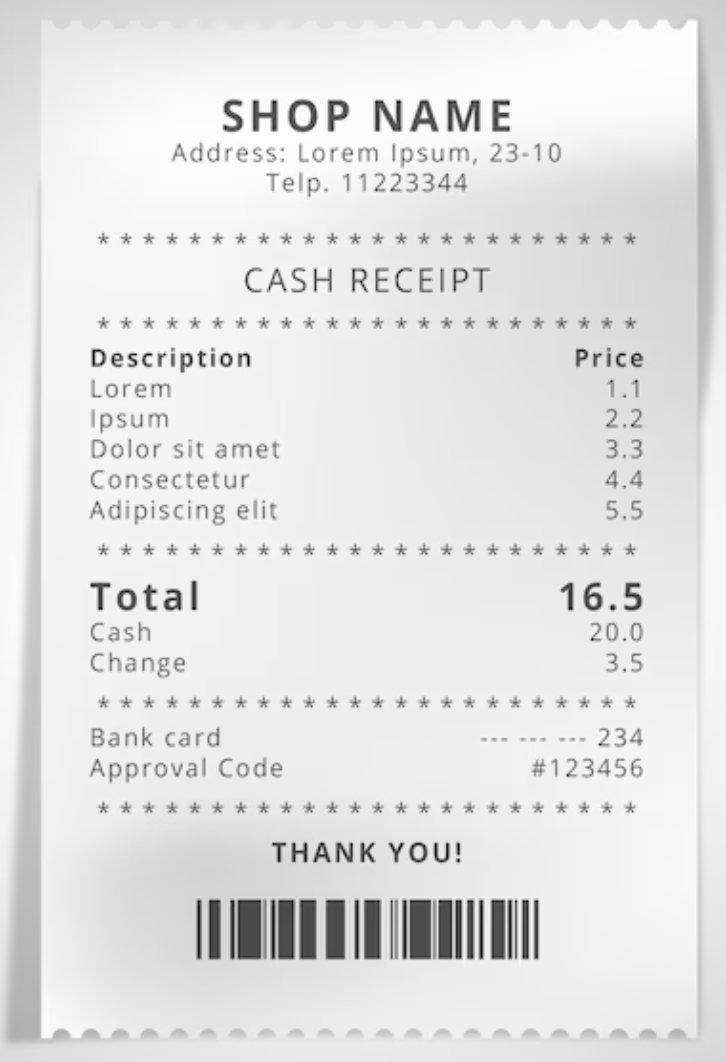

In [19]:
# Adjust parameters for clearer text detection
result = reader.readtext(
    'Receipt.png',
    paragraph=False,
    detail=1,
    contrast_ths=0.15,      # Reduced for better text detection
    adjust_contrast=0.8,    # Increased for better contrast
    text_threshold=0.7,     # Slightly lower threshold to catch all text
    width_ths=1.0,         # Increased for better column separation
    height_ths=0.3,        # Lower for better line separation
    add_margin=0.1         # Add margin around text
)
print(result)

[([[214, 91], [517, 91], [517, 140], [214, 140]], 'SHOP NAME', 0.9940180795509681), ([[168, 138], [566, 138], [566, 168], [168, 168]], 'Address; Lorem Ipsum, 23-10', 0.8084984485627694), ([[262, 167], [473, 167], [473, 200], [262, 200]], 'Telp. 11223344', 0.9448160806941189), ([[97, 229], [295, 229], [295, 249], [97, 249]], '7 + * + + * + * *', 0.15595338912575402), ([[415, 231], [639, 231], [639, 249], [415, 249]], '* * * * * * * * * *', 0.5407036666415054), ([[239, 263], [497, 263], [497, 299], [239, 299]], 'CASH RECEIPT', 0.9910632989990896), ([[93, 313], [297, 313], [297, 333], [93, 333]], '* * * + *+ + * *', 0.10830767167997918), ([[323, 315], [387, 315], [387, 331], [323, 331]], '4 * *', 0.6910978744917079), ([[437, 312], [639, 312], [639, 332], [437, 332]], '** ***+**+', 0.09076731847287116), ([[88, 344], [254, 344], [254, 374], [88, 374]], 'Description', 0.9990212096087333), ([[570, 344], [646, 344], [646, 372], [570, 372]], 'Price', 0.9935553735963598), ([[86, 374], [174, 374]

In [20]:
# Receipt code
def format_receipt_data(result):
    # Initialize dictionary to store receipt data
    receipt_data = {
        'shop_info': {},
        'items': [],
        'totals': {},
        'payment_info': {}
    }

    # Sort results by vertical position (y-coordinate)
    sorted_results = sorted(result, key=lambda x: x[0][0][1])

    for bbox, text, conf in sorted_results:
        clean_text = text.strip()

        # Skip asterisk lines and low confidence detections
        if '*' in clean_text or conf < 0.3:
            continue

        # Shop Information
        if 'SHOP NAME' in clean_text:
            receipt_data['shop_info']['name'] = clean_text
        elif 'Address' in clean_text:
            receipt_data['shop_info']['address'] = clean_text
        elif 'Telp.' in clean_text:
            receipt_data['shop_info']['phone'] = clean_text

        # Items (look for price pattern and description)
        elif any(price_text in clean_text for price_text in ['1.', '2,2', '3,3', '4.4', '5,5']):
            price = clean_text.replace(',', '.')
            # Find corresponding description by y-coordinate
            desc = next((r[1] for r in result if abs(r[0][0][1] - bbox[0][1]) < 10 and r[1] not in [clean_text, 'Price']), '')
            if desc:
                receipt_data['items'].append({
                    'description': desc,
                    'price': float(price) if '.' in price else float(price + '0')
                })

        # Totals section
        elif 'Total' == clean_text:
            # Find total amount by x-coordinate
            total = next((r[1] for r in result if abs(r[0][0][1] - bbox[0][1]) < 10 and r[1] != 'Total'), '')
            if total:
                receipt_data['totals']['total'] = float(total)
        elif 'Cash' == clean_text:
            cash = next((r[1] for r in result if abs(r[0][0][1] - bbox[0][1]) < 10 and r[1] != 'Cash'), '')
            if cash:
                receipt_data['totals']['cash'] = float(cash)
        elif 'Change' == clean_text:
            change = next((r[1] for r in result if abs(r[0][0][1] - bbox[0][1]) < 10 and r[1] != 'Change'), '')
            if change:
                receipt_data['totals']['change'] = float(change)

        # Payment Information
        elif 'Bank card' in clean_text:
            card_number = next((r[1] for r in result if abs(r[0][0][1] - bbox[0][1]) < 10 and r[1] != 'Bank card'), '')
            if card_number:
                receipt_data['payment_info']['card'] = f"*** *** *** {card_number}"
        elif 'Approval Code' in clean_text:
            code = next((r[1] for r in result if '#' in r[1]), '')
            if code:
                receipt_data['payment_info']['approval'] = code

    return receipt_data

# Process the receipt
receipt_data = format_receipt_data(result)

# Print formatted output
print("\nReceipt Details:")
print("================")

print("\nShop Information:")
for key, value in receipt_data['shop_info'].items():
    print(f"{key.title()}: {value}")

print("\nItems:")
for item in receipt_data['items']:
    print(f"{item['description']}: ${item['price']:.2f}")

print("\nTotals:")
for key, value in receipt_data['totals'].items():
    print(f"{key.title()}: ${value:.2f}")

print("\nPayment Information:")
for key, value in receipt_data['payment_info'].items():
    print(f"{key.title()}: {value}")


Receipt Details:

Shop Information:
Name: SHOP NAME
Address: Address; Lorem Ipsum, 23-10
Phone: Telp. 11223344

Items:
Lorem: $1.00
Dolor sit amet: $3.30
Consecterur: $4.40
Adipiscing: $5.50

Totals:
Total: $16.50
Cash: $20.00
Change: $3.50

Payment Information:
Card: *** *** *** 234
Approval: #123456


In [ ]:
# Use a pipeline as a high-level helper
from transformers import pipeline

messages = [
    {"role": "user", "content": "Who are you?"},
]
pipe = pipeline("image-classification", model="microsoft/Phi-3-vision-128k-instruct", framework='pt', trust_remote_code=True)
pipe(messages)